<a href="https://colab.research.google.com/github/Bheady23/MLA_CMB/blob/main/FinalPoject_Regression_CMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Final Project Regression

**Chris Burkhead**

##Part 1. Linear Regression

**Standard Imports**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Specific Imports**

Imports for performing Regression Models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.model_selection import GridSearchCV

Imports building the transformers, the pipeline, and splitting the data.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

Imports for Evaluating the models performance

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

Connecting to Drive

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**2. Linear Regression - Aquire Data**

In [11]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Concrete_Data.csv')

This data set is comprised of over 1000 samples of concrete taken from different concrete pours. It collected the amount of the 8 specific ingredients (that make concrete) in each sample along with testing each sample for the compresive strength of that specific concrete pour. These Models will attempt to establish if their is a correlation or liner realtionship between these ingredient and the compressive strength of concrete.  

**3. Statistics and Visual Exploration**

In [12]:
df.head()

,Cement_kg,Blast_Furnace_Slag_kg,Fly_Ash_kg,Water_kg,Superplasticizer_kg,Coarse_Aggregate_kg,Fine_Aggregate_kg,Age_days,Concrete_compressive_strength_mpas
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
df.tail()

,Cement_kg,Blast_Furnace_Slag_kg,Fly_Ash_kg,Water_kg,Superplasticizer_kg,Coarse_Aggregate_kg,Fine_Aggregate_kg,Age_days,Concrete_compressive_strength_mpas
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [14]:
df.sample(5)

,Cement_kg,Blast_Furnace_Slag_kg,Fly_Ash_kg,Water_kg,Superplasticizer_kg,Coarse_Aggregate_kg,Fine_Aggregate_kg,Age_days,Concrete_compressive_strength_mpas
890,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54
463,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,100,56.06
836,304.0,140.0,0.0,214.0,6.0,895.0,722.0,28,33.42
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.00
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20


In [15]:
df.describe()

,Cement_kg,Blast_Furnace_Slag_kg,Fly_Ash_kg,Water_kg,Superplasticizer_kg,Coarse_Aggregate_kg,Fine_Aggregate_kg,Age_days,Concrete_compressive_strength_mpas
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [16]:
df_strength = df['Concrete_compressive_strength_mpas ']

<Axes: ylabel='Strength in Mpas'>

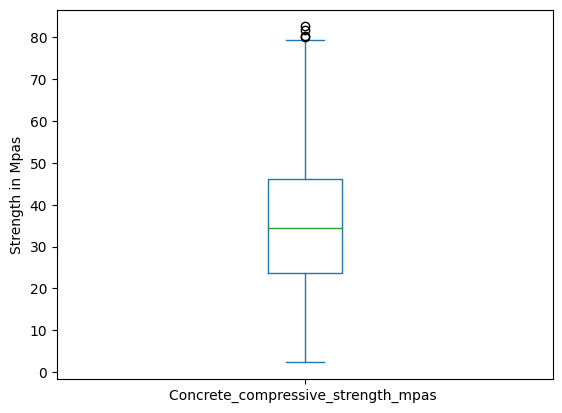

In [17]:
df_strength.plot(kind = 'box', ylabel='Strength in Mpas')

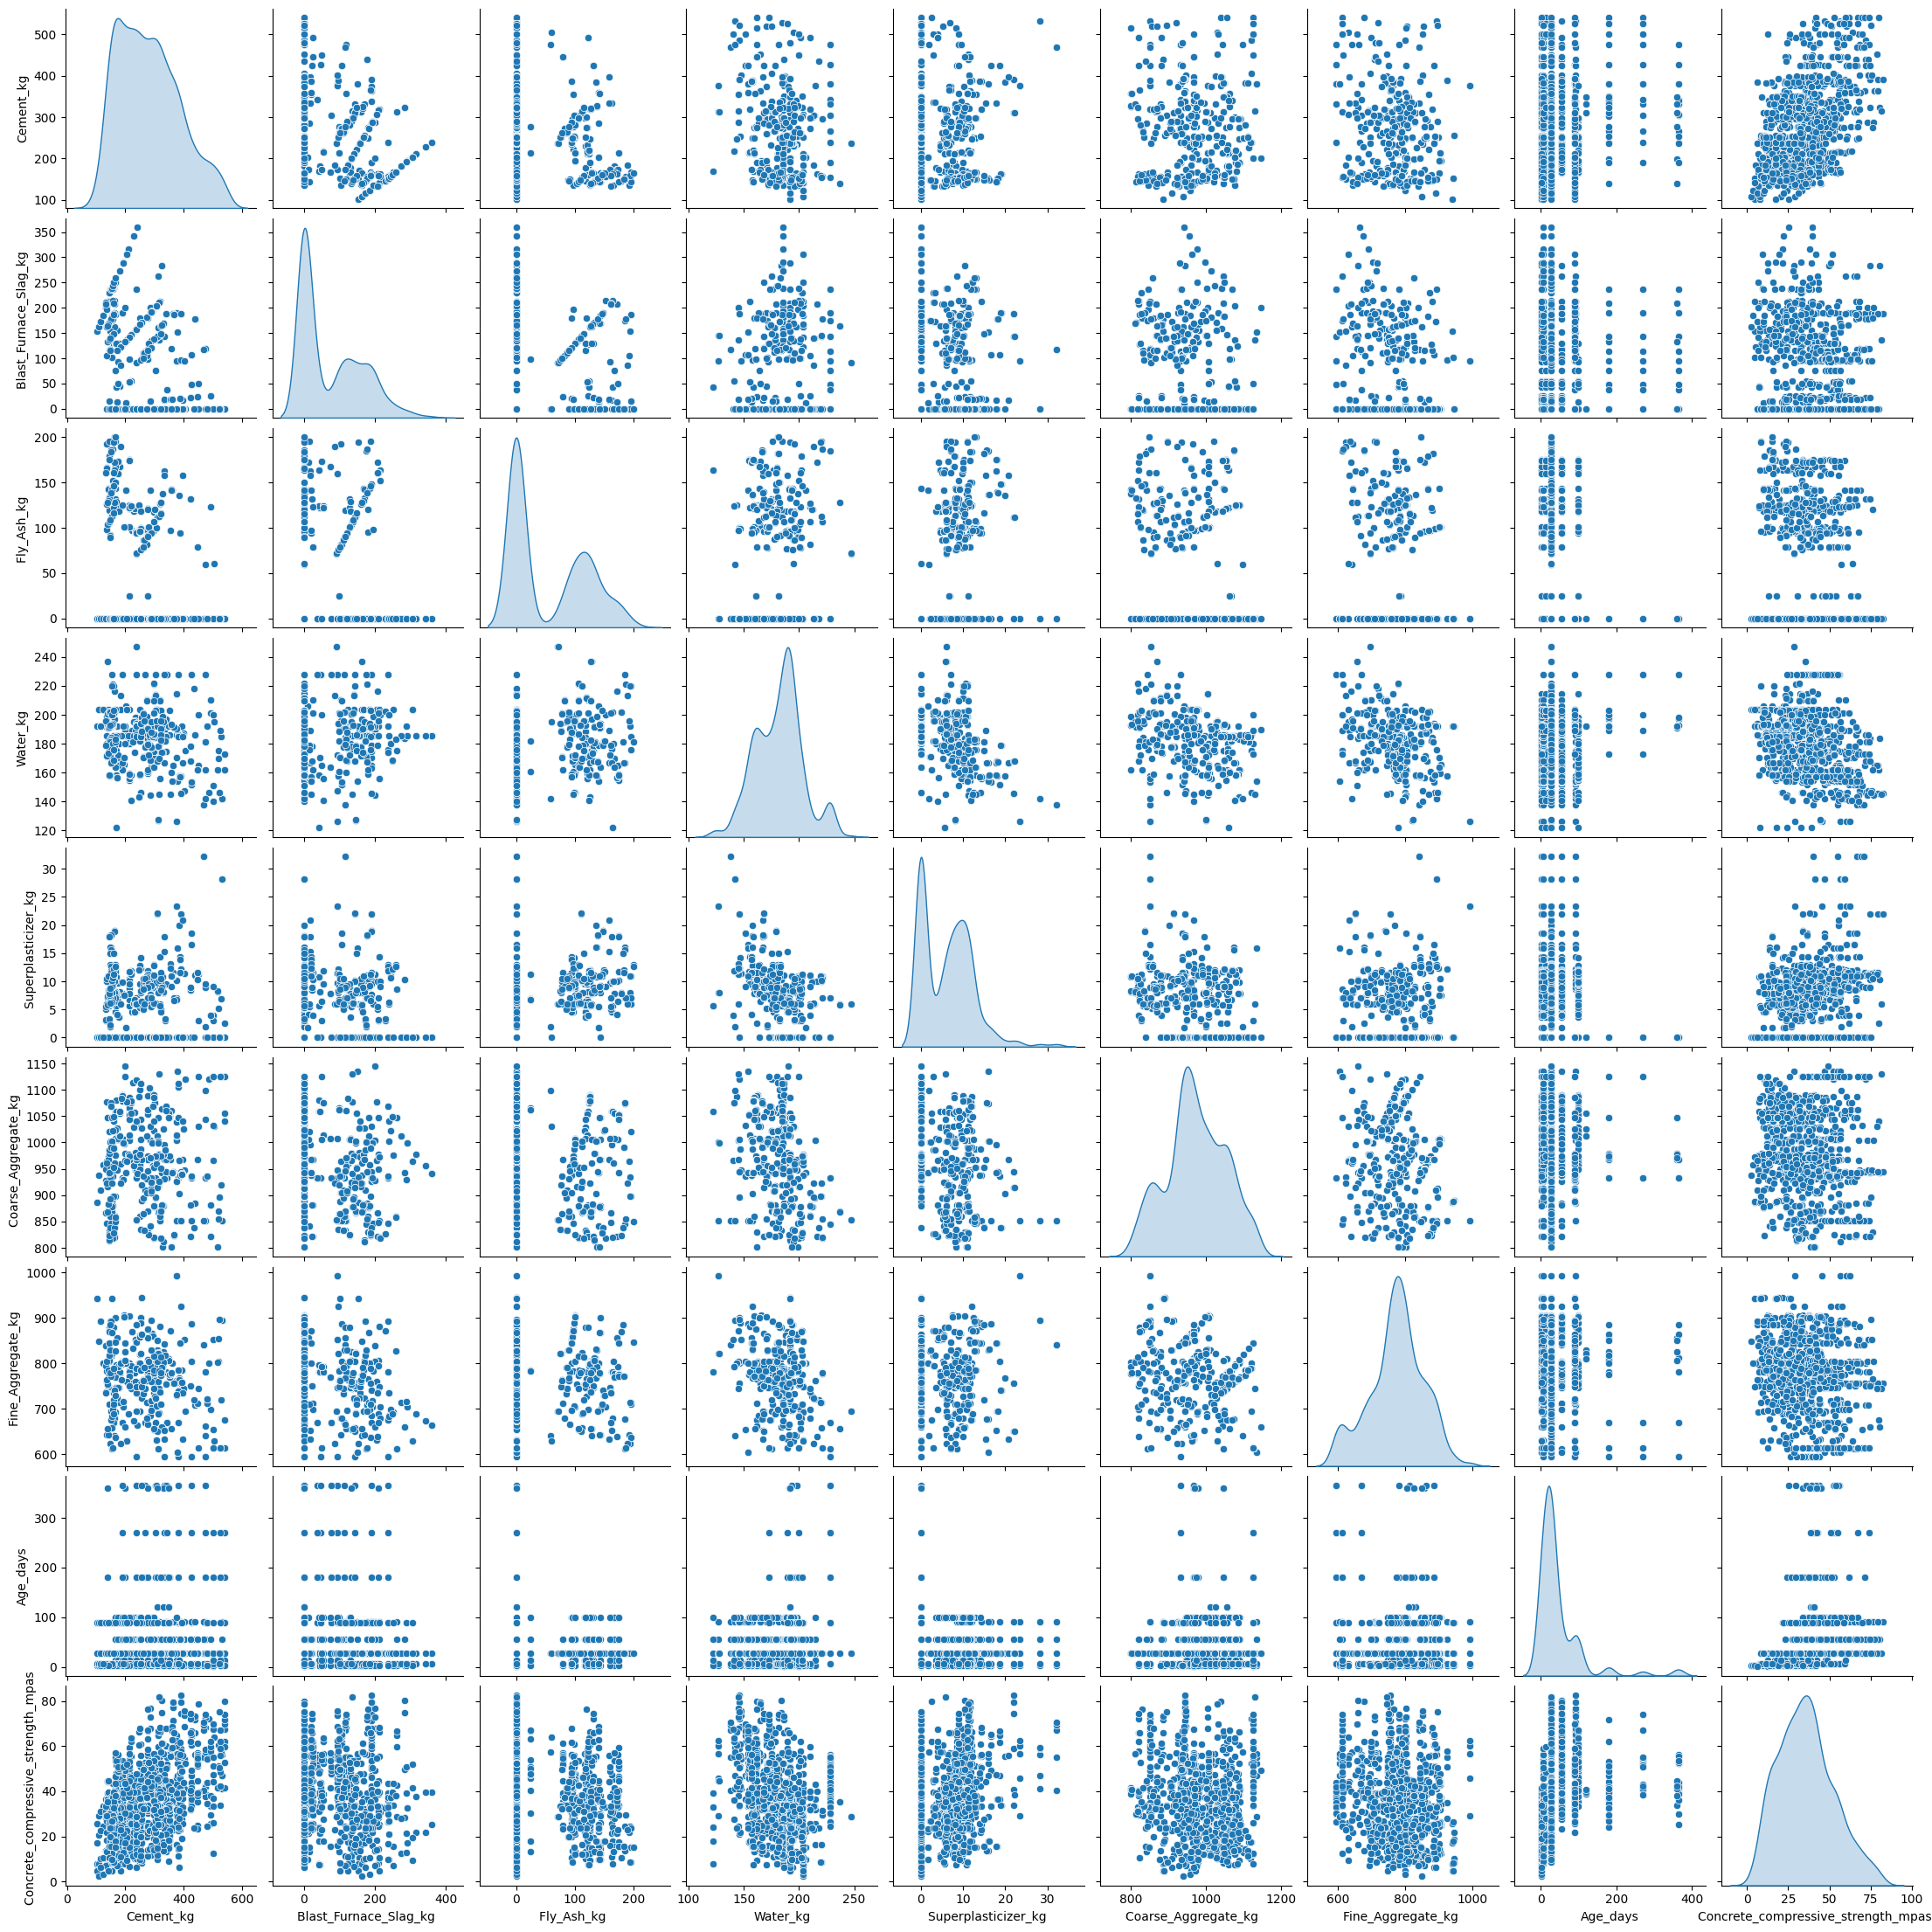

In [18]:
sns.pairplot(df,  diag_kind="kde")

Their does appear to be a slight correlation between how strong concrete is and it's age, in that concrete less than 200 days old is stronger, but this also could be a result of a larger sample size of younger concrete being in the data.

<Axes: >

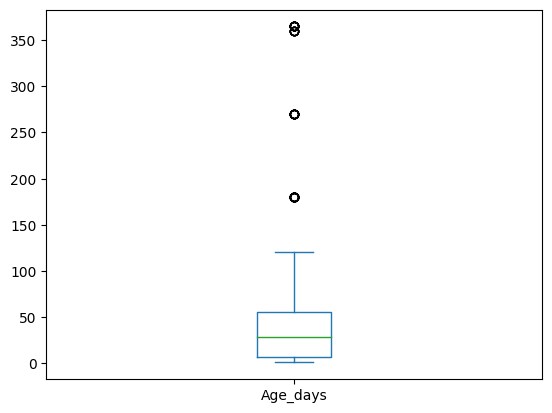

In [19]:
df_age = df['Age_days']
df_age.plot(kind = 'box')

As expected the concrete samples in this data set do skew much younger in how many days old they are, so this might be a false indictor due to insufficent sampling sizes. Let's run the correlation coeificents for the data set to see if their are any strong relationships between ingredients and compressive strength.

In [20]:
df.corr()

,Cement_kg,Blast_Furnace_Slag_kg,Fly_Ash_kg,Water_kg,Superplasticizer_kg,Coarse_Aggregate_kg,Fine_Aggregate_kg,Age_days,Concrete_compressive_strength_mpas
Cement_kg,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast_Furnace_Slag_kg,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_Ash_kg,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water_kg,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer_kg,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse_Aggregate_kg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine_Aggregate_kg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age_days,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete_compressive_strength_mpas,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


According to the correlation matrix we do have some ingredients that correlate better to compresive strength than others, but some actually show a negative correlation. Only cement has a score close to 50%. As such I will limit the train and tests set to just those attributes that correlate better than .3 to eliminate those that have no correlation or even a negative correlation.

**4. Splitting Data into Train/Test**

In [21]:
X = df[['Cement_kg','Superplasticizer_kg ','Age_days']]
y = df['Concrete_compressive_strength_mpas ']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=24)

**5. Building Pipeline**

In [23]:
num_attribs = ['Cement_kg',	'Superplasticizer_kg ',	'Age_days']

In [24]:
col_transform = ColumnTransformer(transformers=[('num',MinMaxScaler(), num_attribs)])


In [25]:
pipeline = Pipeline([ ('transform', col_transform), ('mlr_model', LinearRegression()),])
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Cement_kg',
                                                   'Superplasticizer_kg ',
                                                   'Age_days'])])),
                ('mlr_model', LinearRegression())])

**6. Executing the Model**

In [26]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Cement_kg',
                                                   'Superplasticizer_kg ',
                                                   'Age_days'])])),
                ('mlr_model', LinearRegression())])

**7. Evaluating the Model**

In [27]:
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

In [28]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_pred)**(0.5))

12.108585452885269
11.767652909813341


There is about a .4 difference between the two RMSE scores for the train and test sets. Thats not a huge difference between those two sets, in fact this gives us pretty good confidence that the two sets are capturing similar enough data that this model should be able to make decent to good generalizations about this data set. 


In [29]:
r2_score(y_pred, y_test)

0.07948973429878636

The R2 score being at 0.0 is not good, this means that the model is making imperfect predictions about the data set. 

##Part 2. SVM

Steps 1-3 have already been completed above, so with this model we can move on Step 4.

**4. Splitting into Train/Test**

In [30]:
X = df[['Cement_kg','Superplasticizer_kg ','Age_days']]
y = df['Concrete_compressive_strength_mpas ']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=24)

**5. Building the pipeline** **

In [32]:
num_attribs = ['Cement_kg',	'Superplasticizer_kg ',	'Age_days']

In [33]:
col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)], remainder='passthrough')

In [34]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVR', SVR(kernel="linear", C=1, max_iter=100000, epsilon=0.0)),
                     ])

**6. Executing the Model**

In [35]:
pipeline.fit(X_train, np.ravel(y_train))


Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Cement_kg',
                                                   'Superplasticizer_kg ',
                                                   'Age_days'])])),
                ('SVR',
                 SVR(C=1, epsilon=0.0, kernel='linear', max_iter=100000))])

**7. Evaluating the Model**

In [36]:
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

In [37]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_pred)**(0.5))

12.685547871884385
11.833303812143436


The RMSE for the test and train sets are seperated by about .7 of a point, which is acceptable but still but not great and its worse than the RMSE from the liner regression model. 

In [38]:
r2_score(y_pred, y_test)

-0.9666647244239017

This r2 score is awful, it means that this model did not come close in it's predictions, in fact it's predictions were almost the complete opposite of what we were hoping it to make. 

Let's see if we can improve even more on this model by using a gridsearch pipeline on it.

In [39]:
parameters = {'SVR__C':[1,50,100, 200],
              'SVR__kernel': ['rbf', 'linear'],
              'SVR__max_iter':[100000, 500000, 1000000],} 

In [40]:
grid_pipeline = GridSearchCV(pipeline, param_grid=parameters,cv=5)

In [41]:
grid_pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Cement_kg',
                                                                          'Superplasticizer_kg ',
                                                                          'Age_days'])])),
                                       ('SVR',
                                        SVR(C=1, epsilon=0.0, kernel='linear',
                                            max_iter=100000))]),
             param_grid={'SVR__C': [1, 50, 100, 200],
                         'SVR__kernel': ['rbf', 'linear'],
                         'SVR__max_iter': [100000, 500000, 1000000]})

In [42]:
grid_pipeline.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Cement_kg',
                                                                          'Superplasticizer_kg ',
                                                                          'Age_days'])])),
                                       ('SVR',
                                        SVR(C=1, epsilon=0.0, kernel='linear',
                                            max_iter=100000))]),
             param_grid={'SVR__C': [1, 50, 100, 200],
                         'SVR__kernel': ['rbf', 'linear'],
                         'SVR__max_iter': [100000, 500000, 1000000]})

In [43]:
grid_pipeline.best_params_

{'SVR__C': 200, 'SVR__kernel': 'rbf', 'SVR__max_iter': 100000}

So now that we have the best parameters from the gridpipeline, I'll run those parameters through our original pipeline and then rerun the RMSE for train and test to see if we get any improvement. 

In [44]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVR', SVR(kernel='rbf', C=200, max_iter=100000, epsilon=0.0)),
                     ])

In [45]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Cement_kg',
                                                   'Superplasticizer_kg ',
                                                   'Age_days'])])),
                ('SVR', SVR(C=200, epsilon=0.0, max_iter=100000))])

In [46]:
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

In [47]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_pred)**(0.5))

8.030408344857063
7.815127574880328


This is the best RMSE of the three versions of the models we have run thus far. 

In [48]:
r2_score(y_pred, y_test)

0.6906777275896674

This R2 score is getting close to the acceptable range, would love for it to be above 75%, but just knowing that this version of the SVR model is making predictions that are within the range of 70% of the testing values is a major improvement. 

**Conclusion**

Out of all three versions of the models I used on this data set, Liner Regression, SVR and SVR with gridsearch, the SVR with gridsearch model out performed the other models hands down. While the other models had acceptable RMSE ranges, neither had anywhere close to acceptable R2 scores. The SVR using grid search had the best RMSE score and it's R2 score was on the verge of 70%. 
The downside is even with those scores they are still not enough to say with confidence that the the SVR model with gridsearch can make accurate generalizations about the data set, especially as it pertains to compressive strength in relation to the ingredients in the concrete. In fact it is more accurate to state that there is not a linear relationship between compressive strength and the ingredients in concrete.  